# Predicting churning customers

## Exploratory Data Analysis

 (1) Preliminary analysis
 
 (2) Explore each individual variable

 (3) Explore pairwise relationship between variables

 (4) Explore each variable against the target variable

### (1) Preliminary analysis

In [51]:
import pandas as pd
df = pd.read_csv('./bigml_59c28831336c6604c800002a.csv', sep=',')

%matplotlib inline

In [52]:
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [53]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [54]:
list(df.columns)

['state',
 'account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

In [55]:
df.shape

(3333, 21)

In [56]:
print(df['phone number'].nunique())
print(df['state'].nunique()) 

3333
51


In [57]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### (2) Explore each individual variable: visualizing the distributions of some columns
The column 'state' is discrete and of high cardinality. Therefore using one-hot encoding may result in very sparse features. This feature may be useful.</br>
The column 'area code': why only three values? 'area code' is of int64 type but it may be supposed to be considered as categorical values.</br>
The column 'phone number' is the IDs of the records. It is unique to each record. We will not use it.</br>
The target variable 'churn' is imbalanced (almost 6:1). We may need to tackle this problem.</br></br>

This is a binary classification problem. Each row of the data corresponds to a unique user that belongs to a single class (True/False).

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

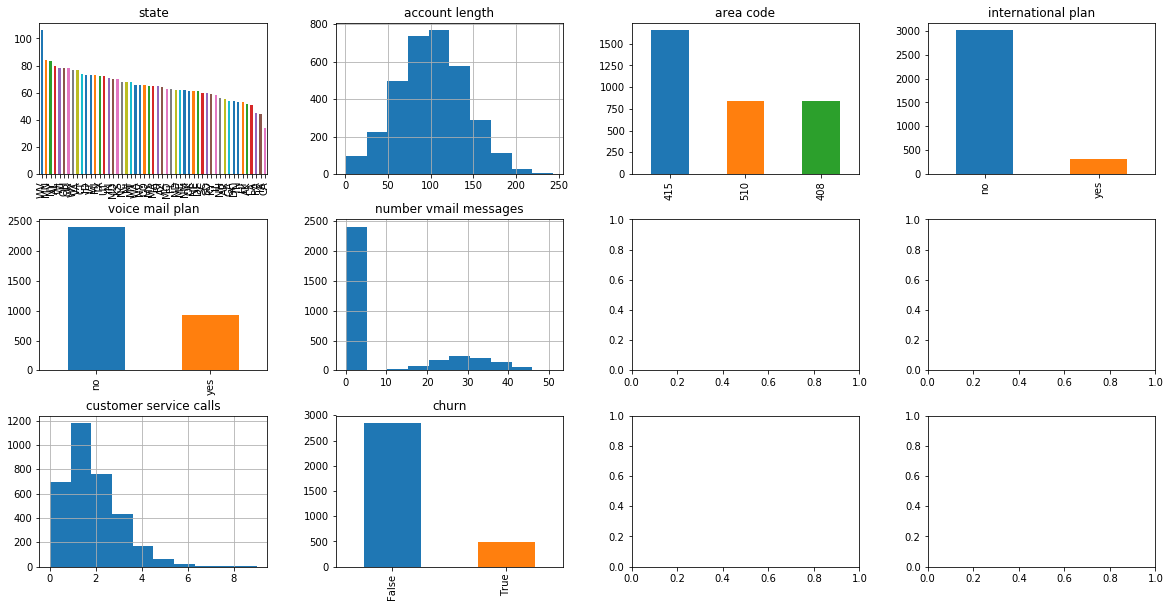

In [10]:
fig, axs = plt.subplots(3, 4, figsize=(20, 10))

df.state.value_counts().plot(kind='bar', ax=axs[0,0]); axs[0,0].set_title('state')
df.hist(column='account length', ax=axs[0,1]); axs[0,1].set_title('account length')
df['area code'].value_counts().plot(kind='bar', ax=axs[0,2]); axs[0,2].set_title('area code')
df['international plan'].value_counts().plot(kind='bar', ax=axs[0,3]); axs[0,3].set_title('international plan')

df['voice mail plan'].value_counts().plot(kind='bar', ax=axs[1,0]); axs[1,0].set_title('voice mail plan')
df.hist(column='number vmail messages', ax=axs[1,1]); axs[1,1].set_title('number vmail messages')

df.hist(column='customer service calls', ax=axs[2,0]); axs[2,0].set_title('customer service calls')
df.churn.value_counts().plot(kind='bar', ax=axs[2,1]); axs[2,1].set_title('churn');

In [10]:
churn_true = len(df[df['churn'] == True].index)
churn_false = len(df[df['churn'] == False].index)
print('Churn rate is: {}. \nchurn_false/churn_true = {}. churn_false - churn_true = {}. \nThe data is imbalanced.'
      .format(churn_true / (churn_true + churn_false), churn_false / churn_true, churn_false - churn_true))


Churn rate is: 0.14491449144914492. 
churn_false/churn_true = 5.900621118012422. churn_false - churn_true = 2367. 
The data is imbalanced.


In [11]:
cols = list(df.columns)
cols.remove('state')
cols.remove('area code')
cols.remove('phone number')
cols.remove('international plan')
cols.remove('voice mail plan')
cols.remove('churn')

# Define a set of columns to be removed. They are not to be used as features.
cols_to_remove = {'phone number', } # 'churn' not included

print(cols)
print()
print(cols_to_remove)


['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

{'phone number'}


### (3) Explore pairwise relationship between variables (scatterplot matrix & correlation matrix)
We can see that there are linear correlations between each of the following column pairs: 'total day minutes' and 'total day charge', 'total eve minutes' and 'total eve charge', 'total night minutes' and 'total night charge', and 'total intl minutes' and 'total intl charge'. </br>

We can therefore remove the four '*** charge' columns.

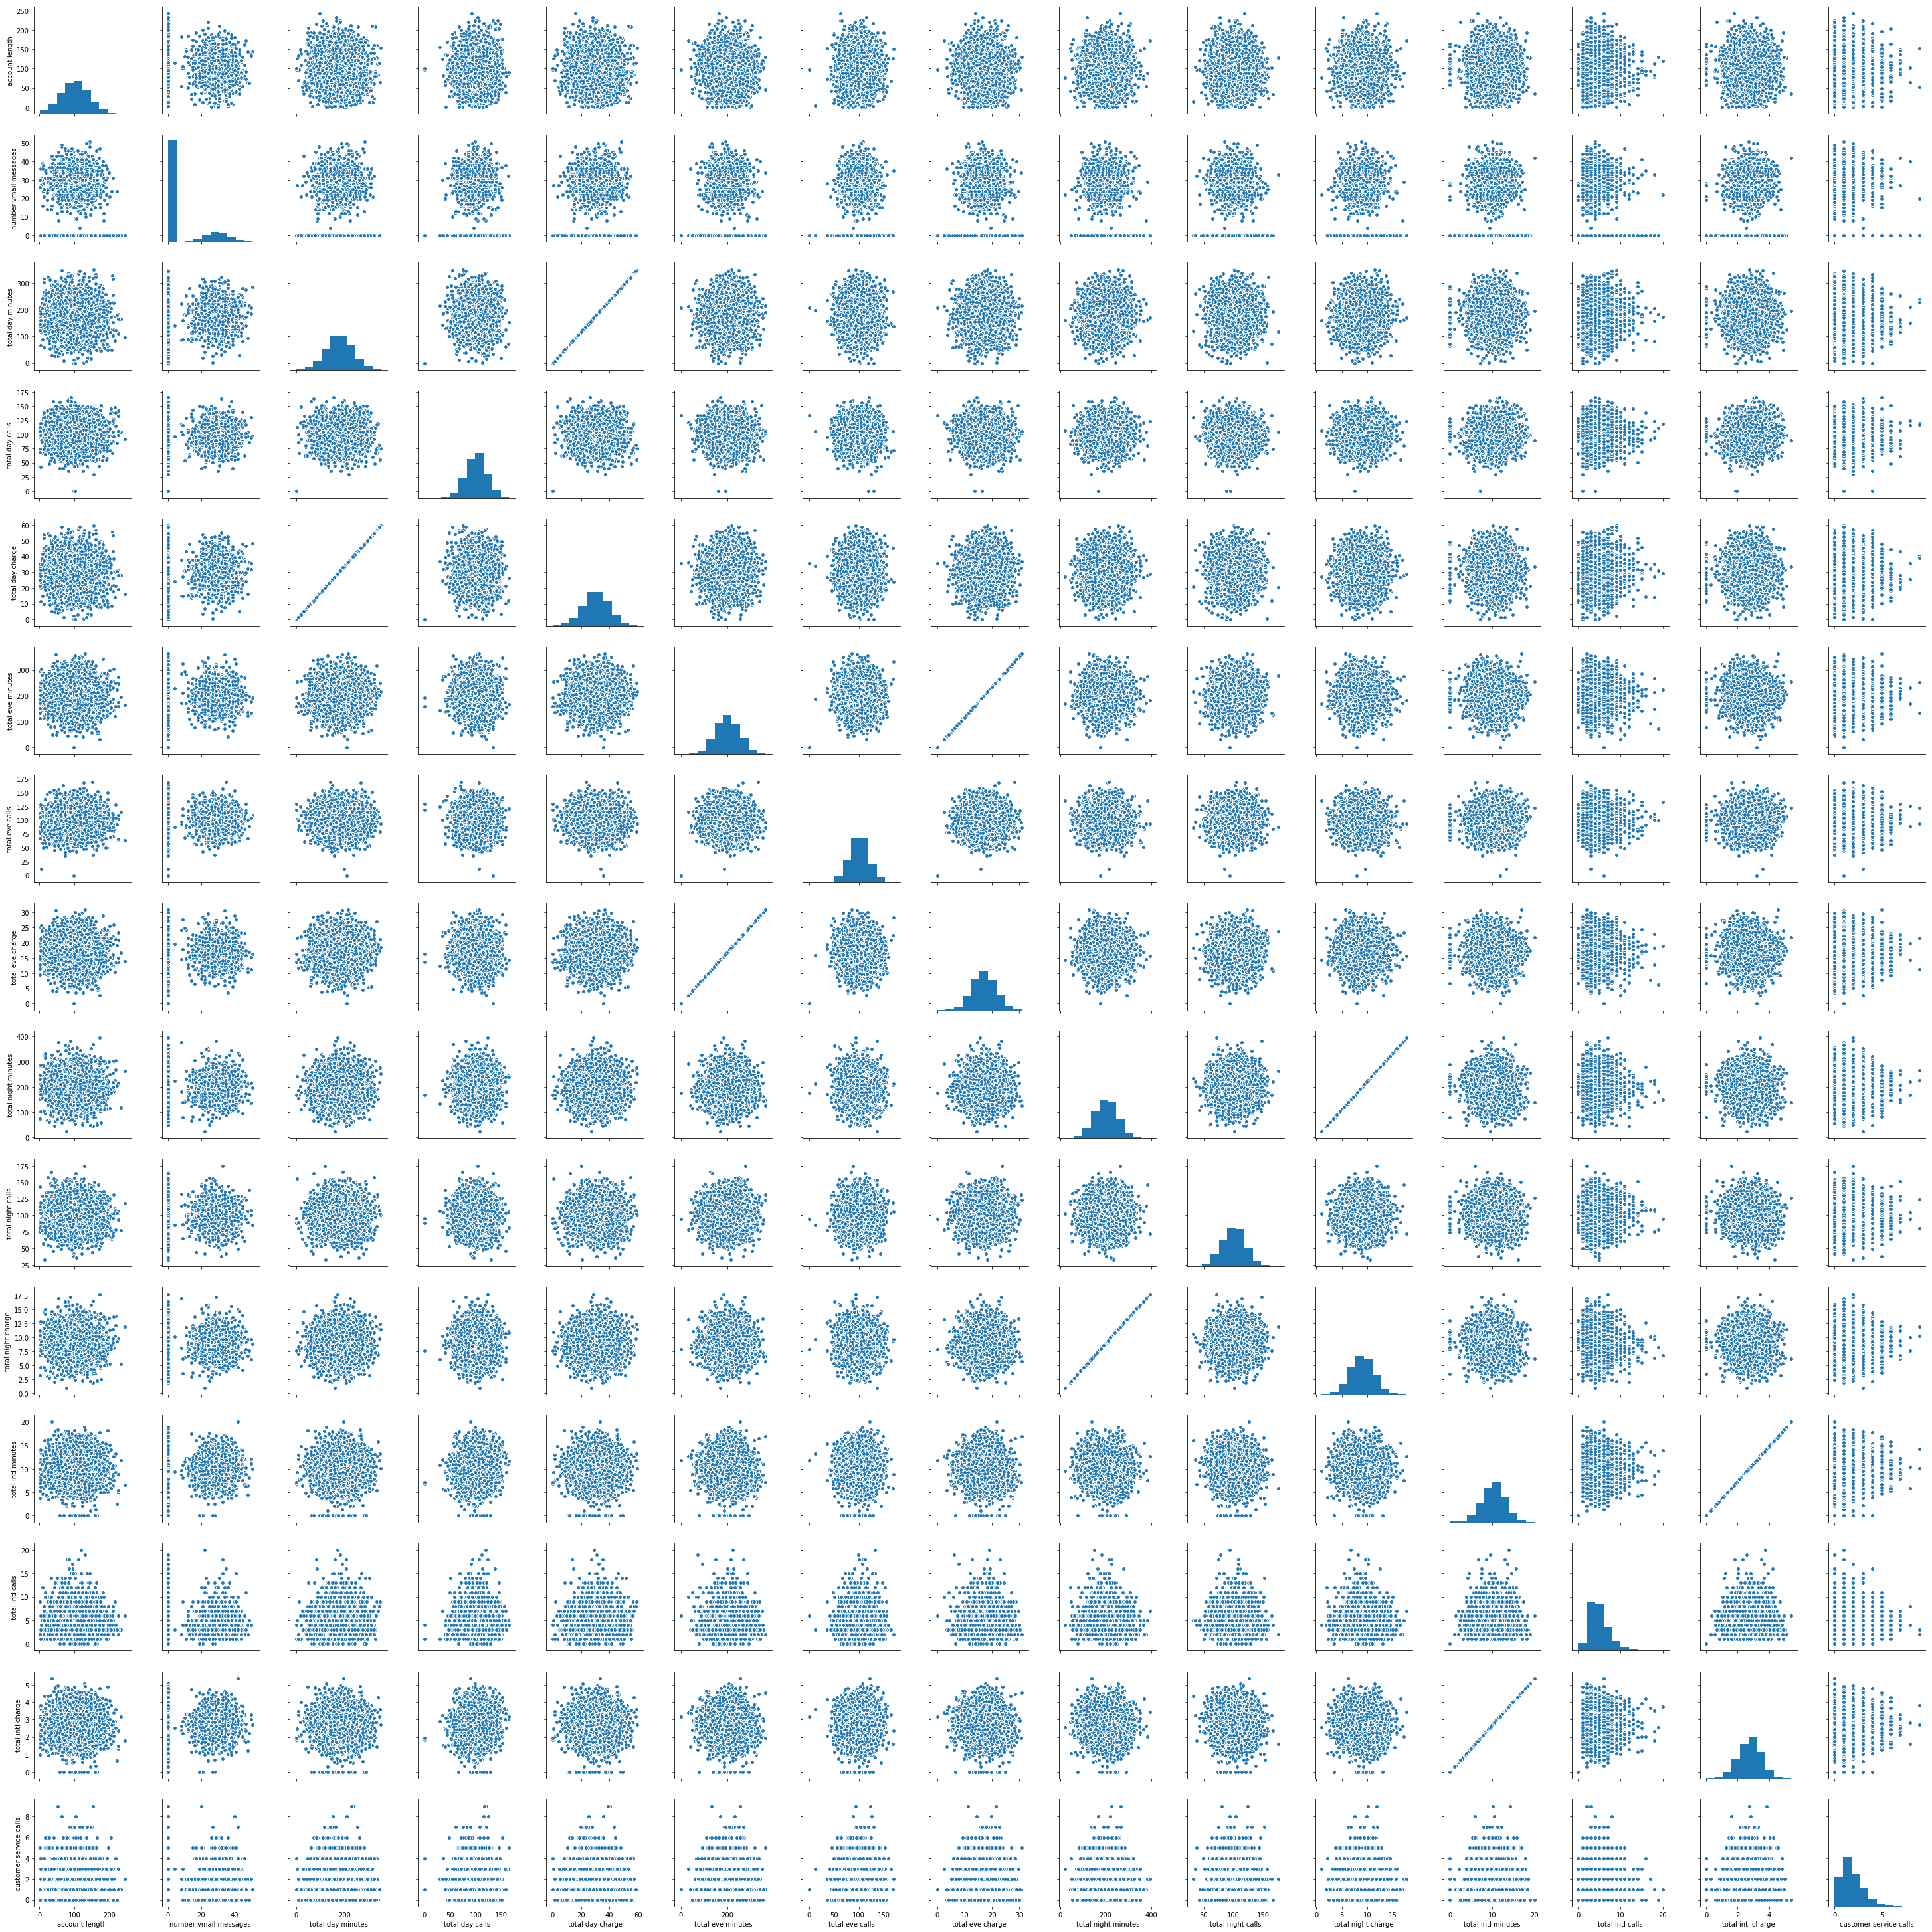

In [15]:
sns.pairplot(df[cols], size=2.7)
plt.tight_layout()
plt.show()

Correlation matrix between each pair of features
This confirms the above observations.

In [13]:
cols

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

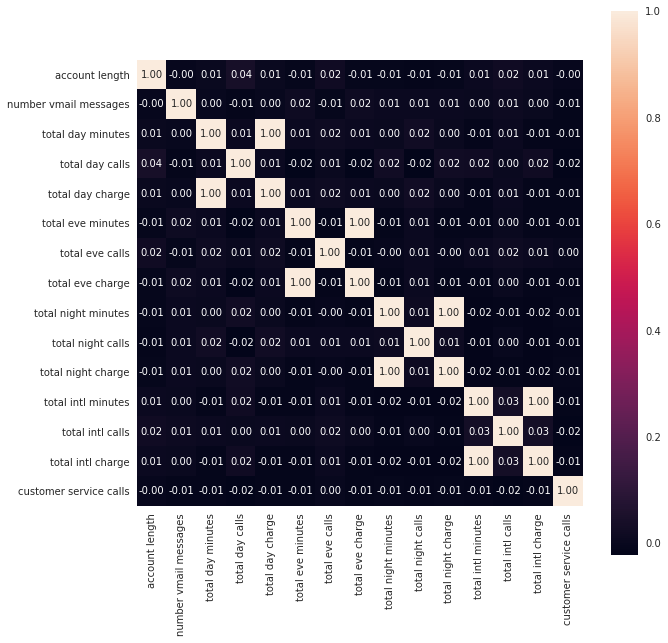

In [17]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.0)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 xticklabels=cols,
                 yticklabels=cols)

plt.show()

In [14]:
cols_to_remove.update(['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
cols_to_remove

{'phone number',
 'total day charge',
 'total eve charge',
 'total intl charge',
 'total night charge'}

### (4) Explore each variable against the target variable
The observation:</br>
positive and negative classes ('churn') of data have different distributions in the the features, especially in 'total day minutes', 'international plan' and 'customer service call', etc.

In [15]:
df.groupby(['churn']).mean()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,,
False,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


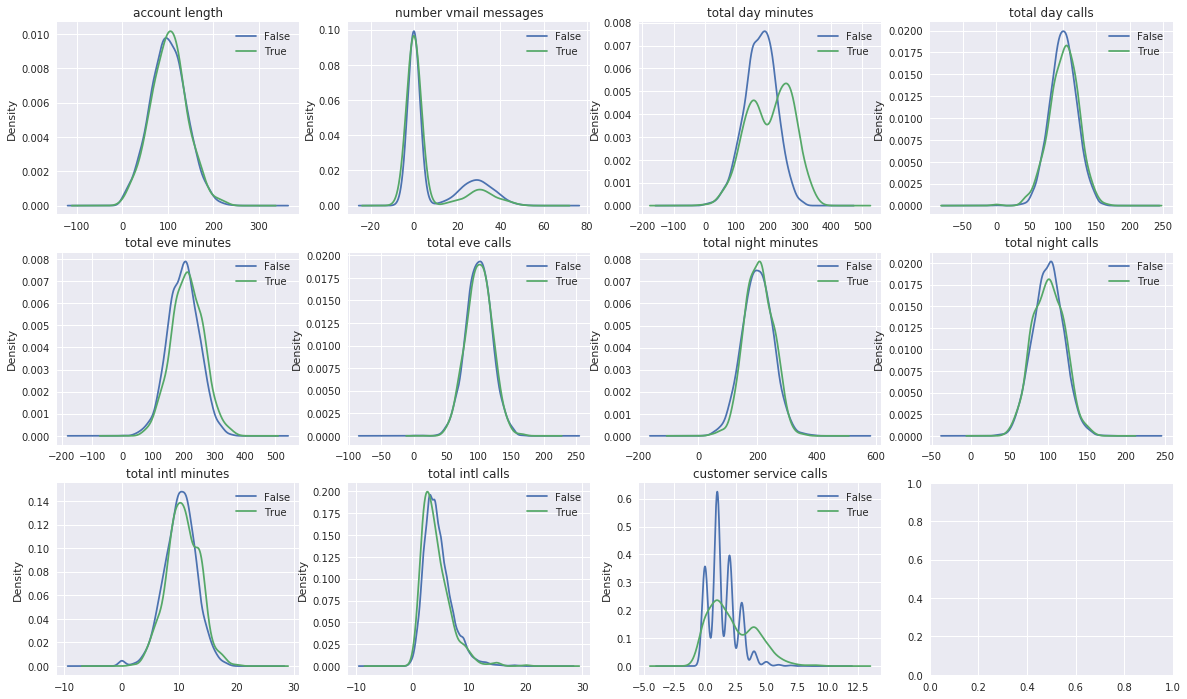

In [19]:
fig, axs = plt.subplots(3, 4, figsize=(20, 12))
df.groupby(['churn'])['account length'].plot(kind='kde', legend=True, ax=axs[0,0]); axs[0,0].set_title('account length')
df.groupby(['churn'])['number vmail messages'].plot(kind='kde', legend=True, ax=axs[0,1]); axs[0,1].set_title('number vmail messages')
df.groupby(['churn'])['total day minutes'].plot(kind='kde', legend=True, ax=axs[0,2]); axs[0,2].set_title('total day minutes')
df.groupby(['churn'])['total day calls'].plot(kind='kde', legend=True, ax=axs[0,3]); axs[0,3].set_title('total day calls')
df.groupby(['churn'])['total eve minutes'].plot(kind='kde', legend=True, ax=axs[1,0]); axs[1,0].set_title('total eve minutes')
df.groupby(['churn'])['total eve calls'].plot(kind='kde', legend=True, ax=axs[1,1]); axs[1,1].set_title('total eve calls')
df.groupby(['churn'])['total night minutes'].plot(kind='kde', legend=True, ax=axs[1,2]); axs[1,2].set_title('total night minutes')
df.groupby(['churn'])['total night calls'].plot(kind='kde', legend=True, ax=axs[1,3]); axs[1,3].set_title('total night calls')
df.groupby(['churn'])['total intl minutes'].plot(kind='kde', legend=True, ax=axs[2,0]); axs[2,0].set_title('total intl minutes')
df.groupby(['churn'])['total intl calls'].plot(kind='kde', legend=True, ax=axs[2,1]); axs[2,1].set_title('total intl calls')
df.groupby(['churn'])['customer service calls'].plot(kind='kde', legend=True, ax=axs[2,2]); axs[2,2].set_title('customer service calls');
# Because the classes are imbalanced, I think 'kde' is more preferred than 'hist' here.

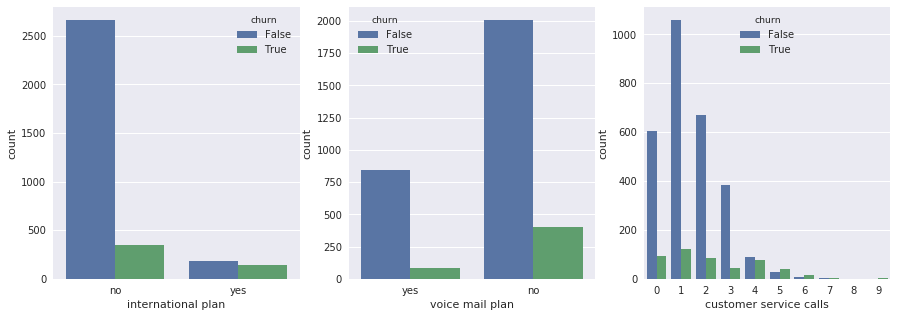

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='international plan', hue='churn', data=df, ax=axs[0])
# axs[0].set_title('international plan')
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axs[1])
# axs[1].set_title('voice mail plan')
sns.countplot(x='customer service calls', hue='churn', data=df, ax=axs[2])

# Data preprocessing

This includes encoding categorical variables, etc.
I did not do feature scaling since I'm going to use tree-based algorithms. 
There is no null values.

In [16]:
cols_to_remove

{'phone number',
 'total day charge',
 'total eve charge',
 'total intl charge',
 'total night charge'}

In [17]:
df2 = df.drop(list(cols_to_remove), axis=1)
df2.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


Applying encoding to categorical variables

In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# The following two are of multiple categories
# ohencoder = OneHotEncoder()

# TODO
# [Observations] 'state' and 'area code' columns are categorical and should be applied with one-hot encoding. 
# However due to 'state' is of high cardinality (51), this would negatively affect the prediction performance (low split gain)
# RF may be affected more than GBDT.
# 'area code' is of 3 categories. I applied one-hot encoding on it.


# The following three are of binary categories
label_encoder = LabelEncoder()
df2['international plan'] = label_encoder.fit_transform(df2['international plan'])
df2['voice mail plan'] = label_encoder.fit_transform(df2['voice mail plan'])
df2['churn'] = label_encoder.fit_transform(df2['churn'])


df2.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [19]:
# one-hot encoding 'area code'
df2 = pd.get_dummies(df2, columns=['area code'], prefix='areacode', drop_first=True)
df2.head(10)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,areacode_415,areacode_510
0,KS,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,0
1,OH,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1,0
2,NJ,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,1,0
3,OH,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,0,0
4,OK,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,1,0
5,AL,118,1,0,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0,0,1
6,MA,121,0,1,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0,0,1
7,MO,147,1,0,0,157.0,79,103.1,94,211.8,96,7.1,6,0,0,1,0
8,LA,117,0,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0,0,0
9,WV,141,1,1,37,258.6,84,222.0,111,326.4,97,11.2,5,0,0,1,0


# Churn Prediction

## Splitting the data for training and testing

Select the features to be used, and then split the data into training dataset and test dataset. Make sure the proportion of different target values is consistent by using 'stratify=y'.

In [20]:
from sklearn.model_selection import train_test_split

X = df2.loc[:, [c for c in list(df2.columns) if c not in cols_to_remove | {'churn', 'state', 'area code'}]].values
y = df2.loc[:, 'churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 15), (667, 15), (2666,), (667,))

Because the data is imbalanced, I'll oversample the minor class (Churn=True) to make the data more balanced using SMOTE.

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, ratio=1.0)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

In [23]:
X_train_balanced.shape, y_train_balanced.shape

((4560, 15), (4560,))

In [24]:
import collections
collections.Counter(y_train_balanced)

Counter({0: 2280, 1: 2280})

## Training and evaluating the models 

I used tree-based algorithms.

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=10, criterion='entropy')
rf.fit(X_train_balanced, y_train_balanced)
y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report, f1_score, roc_auc_score
print(classification_report(y_test, y_pred))

metric_result = pd.DataFrame(data=[['RandomForestClassifier', f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]], 
                             columns=['algorithm', 'f1_score', 'roc_auc_score'])

del y_pred

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       570
           1       0.91      0.81      0.86        97

   micro avg       0.96      0.96      0.96       667
   macro avg       0.94      0.90      0.92       667
weighted avg       0.96      0.96      0.96       667



In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)
ada.fit(X_train_balanced, y_train_balanced)
y_pred = ada.predict(X_test)

print(classification_report(y_test, y_pred))
metric_result.loc[1] = ['AdaBoostClassifier', f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]

del y_pred

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       570
           1       0.94      0.77      0.85        97

   micro avg       0.96      0.96      0.96       667
   macro avg       0.95      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667



In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss='deviance', n_estimators=100, max_depth=4)
gbc.fit(X_train_balanced, y_train_balanced)
y_pred = gbc.predict(X_test)

print(classification_report(y_test, y_pred))
metric_result.loc[2] = ['GradientBoostingClassifier', f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]

del y_pred

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       570
           1       0.92      0.82      0.87        97

   micro avg       0.96      0.96      0.96       667
   macro avg       0.95      0.91      0.92       667
weighted avg       0.96      0.96      0.96       667



In [63]:
metric_result

,algorithm,f1_score,roc_auc_score
0,RandomForestClassifier,0.858696,0.900199
2,GradientBoostingClassifier,0.869565,0.906231
1,AdaBoostClassifier,0.847458,0.882212


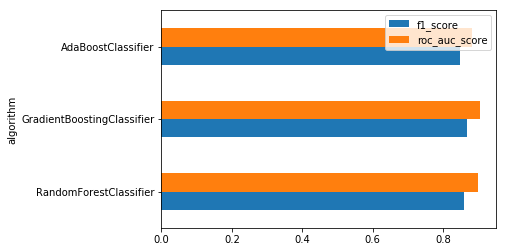

In [69]:
metric_result.plot(x='algorithm', kind='barh')

After I tried one-hot encoding on the 'state' feature, I found that it seems Random Forest tends to be more affected by the encoding, in comparison to Gradient Boosting.

# Next

LightGBM, with Optimal Split for Categorical Features (https://lightgbm.readthedocs.io/en/latest/Features.html#optimal-split-for-categorical-features)

AdaCost: Misclassification Cost-sensitive Boosting